# Práctica Final: Dataset Airbnb

**Asignatura**: Aprendizaje automático  
**Ejercicio**: Práctica final  
**Fecha de entrega**: 17 Febrero de 2021  
**Autora**: Helena Antich Homar  
  

  
#### Descripción del programa:
Este programa analiza y limpia los datos del fichero de Airbnb

## Librerías y directorios
A continuación vamos a cargar todas las librerías a utilizar en el programa y a determinar el directorio de trabajo para poder leer los datos.  
Para modificar el directorio de trabajo, en el que se ubica el fichero de datos, hay que modificar la variable `working_directory`.

In [1]:
#%% Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [20]:
#%% Directories
working_directory = '/Users/Helena/Documents/MASTER MUSI/AA - ML - Aprendizaje automático/FINAL'
os.chdir(working_directory)

path_data = os.path.join(os.getcwd(), 'airbnb.csv')

In [3]:
#%% Loading data
df_airbnb_raw = pd.read_csv(path_data)
df_airbnb = df_airbnb_raw.copy()
df_airbnb.head()
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17608 non-null  int64  
 1   listing_url                                   17608 non-null  object 
 2   scrape_id                                     17608 non-null  int64  
 3   last_scraped                                  17608 non-null  object 
 4   name                                          17607 non-null  object 
 5   description                                   17393 non-null  object 
 6   neighborhood_overview                         8213 non-null   object 
 7   picture_url                                   17608 non-null  object 
 8   host_id                                       17608 non-null  int64  
 9   host_url                                      17608 non-null 

Viendo que hay columnas que son todo "null" podemos eliminarlas directamente, ya que no aportan información.  
Además el precio, que es la variable a predecir, es de tipo "objeto" y debería ser de tipo valor, incluso para hace el estudio de outliers.

In [4]:
df_airbnb = df_airbnb.drop(columns = ['calendar_updated','bathrooms','neighbourhood_group_cleansed'])
df_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,...,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47
2,105891,https://www.airbnb.com/rooms/105891,20200919153121,2020-09-20,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,The village's population does not reach two th...,https://a0.muscache.com/pictures/1036816/f36ce...,549192,https://www.airbnb.com/users/show/549192,...,10.0,9.0,10.0,ETV/6127,t,2,2,0,0,0.14
3,106833,https://www.airbnb.com/rooms/106833,20200919153121,2020-09-20,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,NaN,https://a0.muscache.com/pictures/710218/98134c...,551974,https://www.airbnb.com/users/show/551974,...,10.0,9.0,9.0,ET/1961,f,1,1,0,0,0.09
4,130669,https://www.airbnb.com/rooms/130669,20200919153121,2020-09-20,Room great apartment,Located in a residential neighbourhood and 10m...,"Located in the center of the city, within minu...",https://a0.muscache.com/pictures/866653/58dc48...,643065,https://www.airbnb.com/users/show/643065,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN


In [5]:
df_airbnb.price = df_airbnb.price.str.replace("$","").str.replace(",","").astype(float)
df_airbnb.price.dtype
df_airbnb.price.head()

0     89.0
1    175.0
2    140.0
3    200.0
4    110.0
Name: price, dtype: float64

Ahora que el precio es del tipo número de coma flotante, veamos un resumen estadístico de esta columna:

In [6]:
df_airbnb.price.describe()

count    17608.000000
mean       244.383561
std        409.958169
min          0.000000
25%        110.000000
50%        179.000000
75%        275.000000
max      20736.000000
Name: price, dtype: float64

Dado que el mínimo es un "0" absoluto, tiene que haber un valor al menos que no tenga ningún precio. Este objeto sin precio puede desplazar la media y complicar el análisis mientras que en la realidad no aporta información. Por ello lo eliminamos.

In [7]:
df_airbnb[df_airbnb.price == 0.]
df_airbnb = df_airbnb[df_airbnb.price != 0.]
df_airbnb.price.describe()

count    17607.000000
mean       244.397441
std        409.965674
min         10.000000
25%        110.000000
50%        179.000000
75%        275.000000
max      20736.000000
Name: price, dtype: float64

Teniendo en cuenta la desviación estándar, vamos a filtrar el dataframe para eliminar outliers teniendo en cuenta la distribución estadística del precio (boxplot) y la distribución por cuantiles (probplot).

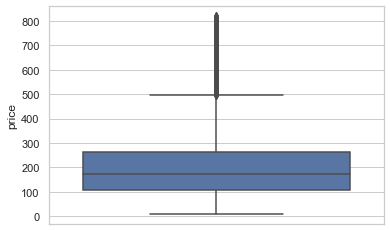

In [18]:
std = df_airbnb.price.describe()[2]
df = df_airbnb.loc[(df_airbnb.price <= 2*std )]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y="price", data=df)

((array([-3.94235327, -3.72430797, -3.6049135 , ...,  3.6049135 ,
          3.72430797,  3.94235327]),
  array([ 10.,  10.,  10., ..., 819., 819., 819.])),
 (131.29438762345103, 207.04338629881855, 0.9385583739817922))

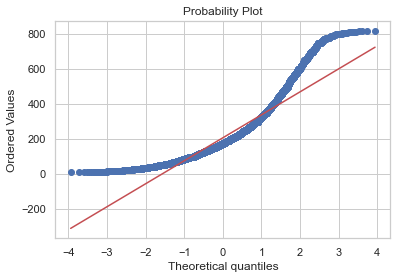

In [19]:
stats.probplot(df.price, plot=sns.mpl.pyplot)

Habiendo visto las distribuciones nos hemos quedado con el 95,4% de los datos. Lo que equivale a dos veces la desviación estándar. 

A continuación vamos a seguir tratando las columnas del dataset. 